In [1]:
# nlist has list of items as per the website.
nlist = ['Infectious and parasitic','Neoplasms','Endocrine, metabolic & immunity','blood system','Mental disorders',
    'Nervous system','Circulatory system','Respiratory system','Digestive system',
    'Genitourinary system','Pregnancy, childbirth','Skin and subcutaneous',
    'Musculoskeletal system & connective tissue','Congenital anomalies',
    'ill defined conditions','Injury_and_poisoning','External causes of injury',
    'Supplemental classification','RareDX']

In [3]:
import pandas as pd
import numpy as np

# v2c is in the provided data and changing it is giving an error

v2c = {
    'Infectious_and_parasitic_diseases': 'bs01lr',
    'Neoplasms': 'bs02lr',
    'Endocrine,nutritional_and_metabolic diseases_and_immunity_disorders': 'bs03lr',
    'Diseases_of_the_blood_and_bloodforming_organs': 'bs04lr',
    'Mental_disorders': 'bs05lr',
    'Diseases_of_the_nervous_system_and_sense_organs': 'bs06lr',
    'Diseases_of_the_circulatory_system': 'bs07lr',
    'Diseases_of_the_respiratory_system': 'bs08lr',
    'Diseases_of_the_digestive_system': 'bs09lr',
    'Diseases_of_the_genitourinary_system': 'bs10lr',
    'Complications_of_pregnancy,_childbirth,_and_the_puerperium': 'bs11lr',
    'Diseases_of_the_skin_and_subcutaneous_tissue': 'bs12lr',
    'Diseases_of_the_musculoskeletal_system_and_connective_tissue': 'bs13lr',
    'Congenital_anomalies': 'bs14lr',
    'Symptoms,_signs,_and_ill_defined_conditions': 'bs16lr',
    'Injury_and_poisoning': 'bs17lr',
    'E_codes': 'bs18lr',
    'V_codes': 'bs19lr',
    'RareDX': 'rare_disease'
}

c2v = {v: k for k, v in v2c.items()}

df = pd.read_csv("/Users/tejaswanidash/Desktop/HAP 790/Data/BCwithTime and Order.xlsx",low_memory=False,error_bad_lines=False) \
    .assign(
        bc_1=lambda d: d['BC1'].apply(lambda v: v2c[v]), 
        bc_2=lambda d: d['BC2'].apply(lambda v: v2c[v])) \
    .rename(columns={
        'Total patnum': 'n', 
        'BC1 first DX Patnum': 'n_1',
        'BC2 first DX Patnum': 'n_2',
        'Same day  BC1 and BC2 Patnum': 'n_t',
        'SumDayDiff (total)': 'sum_day_diff', 
        'AvgDaydiff': 'avg_day_diff'}) \
    .drop(columns=['BC1', 'BC2'])\
    [['bc_1', 'bc_2', 'n', 'n_1', 'n_2', 'n_t', 'sum_day_diff', 'avg_day_diff']]

df.shape

b'Skipping line 4: expected 1 fields, saw 2\nSkipping line 10: expected 1 fields, saw 2\nSkipping line 12: expected 1 fields, saw 2\nSkipping line 13: expected 1 fields, saw 2\nSkipping line 16: expected 1 fields, saw 3\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 20: expected 1 fields, saw 2\nSkipping line 21: expected 1 fields, saw 2\nSkipping line 25: expected 1 fields, saw 2\nSkipping line 26: expected 1 fields, saw 2\nSkipping line 27: expected 1 fields, saw 2\nSkipping line 28: expected 1 fields, saw 3\nSkipping line 31: expected 1 fields, saw 3\nSkipping line 36: expected 1 fields, saw 2\nSkipping line 37: expected 1 fields, saw 2\nSkipping line 44: expected 1 fields, saw 3\nSkipping line 45: expected 1 fields, saw 3\nSkipping line 47: expected 1 fields, saw 2\nSkipping line 53: expected 1 fields, saw 2\nSkipping line 57: expected 1 fields, saw 2\nSkipping line 58: expected 1 fields, saw 2\nSkipping line 62: expected 1 fields, saw 2\nSkipping line 66: expected 1 fi

ParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.


In [3]:
df

,bc_1,bc_2,n,n_1,n_2,n_t,sum_day_diff,avg_day_diff
0,bs01lr,bs02lr,27020,13534,12005,1481,2780593,102
1,bs01lr,bs03lr,51702,17835,28878,4989,-14513656,-280
2,bs01lr,bs04lr,16303,8354,7065,884,2894519,177
3,bs01lr,bs05lr,52414,19656,28917,3841,-10176298,-194
4,bs01lr,bs06lr,53127,26189,24227,2711,3378359,63
...,...,...,...,...,...,...,...,...
166,bs17lr,bs19lr,96140,41135,52157,2848,-16061590,-167
167,bs17lr,rare_disease,69589,20703,20791,28096,-1486110,-21
168,bs18lr,bs19lr,35582,13906,20907,769,-9989873,-280
169,bs18lr,rare_disease,30637,8724,9606,12308,-1870223,-61


In [4]:
import itertools
import numpy as np

def get_val(v1, v2):
    if v1 == v2:
        return np.nan
    
    temp = df[(df['bc_1']==v1) & (df['bc_2']==v2)]
    
    if temp.shape[0] == 0:
        temp = df[(df['bc_1']==v2) & (df['bc_2']==v1)]
    
    if temp.shape[0] > 0:
        return -(temp.iloc[0]['n_1'] + temp.iloc[0]['n_2'])
    
    return np.nan

body_systems = sorted(list(set(list(df['bc_1'].unique()) + list(df['bc_2'].unique()))))

M = pd.DataFrame(
    [[get_val(v1, v2) for v2 in body_systems] for v1 in body_systems], 
    columns=body_systems, index=body_systems).fillna(0.0)
M = M + np.diag(np.abs(M).sum(axis=1))
pd.DataFrame({
    'off': np.abs((M - np.diag(np.diag(M))).sum(axis=1)),
    'diag': pd.Series(np.diag(M), index=M.index)
})

def get_b(v):
    s = df[(df['bc_1']==v) | (df['bc_2']==v)] \
        .assign(
            n_before=lambda d: d.apply(lambda r: r['n_1'] if r['bc_1']==v else r['n_2'], axis=1),
            n_after=lambda d: d.apply(lambda r: r['n_2'] if r['bc_1']==v else r['n_1'], axis=1)) \
        [['n_before', 'n_after']].sum()
    before = s['n_before']
    after = s['n_after']
    return 1 + 0.5 * (before - after)

C = 2 * np.eye(M.shape[0]) + M
C

,bs01lr,bs02lr,bs03lr,bs04lr,bs05lr,bs06lr,bs07lr,bs08lr,bs09lr,bs10lr,bs11lr,bs12lr,bs13lr,bs14lr,bs16lr,bs17lr,bs18lr,bs19lr,rare_disease
bs01lr,637627.0,-25539.0,-46713.0,-15419.0,-48573.0,-50416.0,-48145.0,-35390.0,-41477.0,-30942.0,-107.0,-33270.0,-52303.0,-3450.0,-58821.0,-24687.0,-10835.0,-73860.0,-37678.0
bs02lr,-25539.0,893457.0,-76389.0,-25380.0,-61200.0,-75341.0,-78020.0,-50145.0,-56412.0,-47919.0,-94.0,-43067.0,-70433.0,-4632.0,-85087.0,-27333.0,-12250.0,-108658.0,-45556.0
bs03lr,-46713.0,-76389.0,1837424.0,-41624.0,-136904.0,-175336.0,-163878.0,-99835.0,-116089.0,-94713.0,-198.0,-79501.0,-159663.0,-8227.0,-183868.0,-57651.0,-24303.0,-266932.0,-105598.0
bs04lr,-15419.0,-25380.0,-41624.0,518131.0,-33595.0,-40487.0,-46325.0,-28972.0,-34101.0,-29774.0,-55.0,-21993.0,-39135.0,-2853.0,-45582.0,-16403.0,-8571.0,-57584.0,-30276.0
bs05lr,-48573.0,-61200.0,-136904.0,-33595.0,1680060.0,-149652.0,-135241.0,-92287.0,-109153.0,-76799.0,-304.0,-71780.0,-153221.0,-7370.0,-173381.0,-63430.0,-24713.0,-241322.0,-101133.0
bs06lr,-50416.0,-75341.0,-175336.0,-40487.0,-149652.0,1889801.0,-177224.0,-102281.0,-122021.0,-95987.0,-259.0,-81166.0,-170218.0,-8488.0,-189985.0,-63380.0,-25489.0,-265552.0,-96517.0
bs07lr,-48145.0,-78020.0,-163878.0,-46325.0,-135241.0,-177224.0,1850266.0,-101596.0,-114760.0,-100083.0,-113.0,-79493.0,-155918.0,-8284.0,-189170.0,-55262.0,-24451.0,-272447.0,-99854.0
bs08lr,-35390.0,-50145.0,-99835.0,-28972.0,-92287.0,-102281.0,-101596.0,1217721.0,-79064.0,-60762.0,-209.0,-54032.0,-101529.0,-5858.0,-118668.0,-42901.0,-18460.0,-155308.0,-70422.0
bs09lr,-41477.0,-56412.0,-116089.0,-34101.0,-109153.0,-122021.0,-114760.0,-79064.0,1401262.0,-70168.0,-191.0,-61867.0,-120766.0,-6734.0,-138066.0,-49362.0,-20587.0,-182189.0,-78253.0
bs10lr,-30942.0,-47919.0,-94713.0,-29774.0,-76799.0,-95987.0,-100083.0,-60762.0,-70168.0,1110991.0,-263.0,-48565.0,-89969.0,-5923.0,-105469.0,-34665.0,-16355.0,-141002.0,-61631.0


In [5]:
b = pd.Series([get_b(v) for v in body_systems], index=body_systems)


In [6]:
C.shape

(19, 19)

In [8]:
c_matrix_inv = np.linalg.inv(C)
print(c_matrix_inv.shape)

(19, 19)


In [9]:
rank_matrix = np.dot(a=c_matrix_inv,b=b)
print(rank_matrix)

[0.51416557 0.48643611 0.63893162 0.4726755  0.60744166 0.47917462
 0.67506084 0.51602424 0.52134195 0.5062092  0.43777719 0.45611358
 0.52281344 0.44186438 0.46637494 0.43598912 0.40563631 0.48938244
 0.42658728]


In [10]:
my_rank_data = pd.DataFrame(data=rank_matrix,columns=['Rank Score'],index=nlist)


In [11]:
my_rank_data_sorted = my_rank_data.sort_values(by=['Rank Score'],ascending=True)
my_rank_data_sorted

,Rank Score
External causes of injury,0.405636
RareDX,0.426587
Injury_and_poisoning,0.435989
"Pregnancy, childbirth",0.437777
Congenital anomalies,0.441864
Skin and subcutaneous,0.456114
ill defined conditions,0.466375
blood system,0.472675
Nervous system,0.479175
Neoplasms,0.486436


In [40]:
Correlation_Matrix = C.corr().round(2)

In [41]:
Correlation_Matrix

,bs01lr,bs02lr,bs03lr,bs04lr,bs05lr,bs06lr,bs07lr,bs08lr,bs09lr,bs10lr,bs11lr,bs12lr,bs13lr,bs14lr,bs16lr,bs17lr,bs18lr,bs19lr,rare_disease
bs01lr,1.00,0.00,-0.02,0.02,-0.03,-0.03,-0.03,-0.01,-0.02,-0.00,0.04,-0.01,-0.04,0.03,-0.05,0.00,0.02,-0.07,-0.02
bs02lr,0.00,1.00,-0.05,-0.01,-0.03,-0.05,-0.05,-0.02,-0.03,-0.02,0.04,-0.02,-0.04,0.02,-0.06,0.01,0.02,-0.09,-0.01
bs03lr,-0.02,-0.05,1.00,-0.03,-0.08,-0.11,-0.10,-0.06,-0.07,-0.06,0.02,-0.05,-0.09,-0.01,-0.11,-0.03,-0.02,-0.17,-0.06
bs04lr,0.02,-0.01,-0.03,1.00,-0.01,-0.03,-0.04,-0.01,-0.02,-0.01,0.05,0.01,-0.02,0.03,-0.04,0.02,0.02,-0.06,-0.01
bs05lr,-0.03,-0.03,-0.08,-0.01,1.00,-0.09,-0.07,-0.05,-0.06,-0.04,-0.02,-0.04,-0.09,-0.00,-0.11,-0.04,-0.02,-0.16,-0.06
bs06lr,-0.03,-0.05,-0.11,-0.03,-0.09,1.00,-0.11,-0.06,-0.07,-0.06,-0.00,-0.05,-0.10,-0.01,-0.11,-0.04,-0.02,-0.16,-0.05
bs07lr,-0.03,-0.05,-0.10,-0.04,-0.07,-0.11,1.00,-0.06,-0.07,-0.07,0.04,-0.05,-0.09,-0.01,-0.11,-0.03,-0.02,-0.17,-0.06
bs08lr,-0.01,-0.02,-0.06,-0.01,-0.05,-0.06,-0.06,1.00,-0.05,-0.03,0.01,-0.03,-0.06,0.01,-0.08,-0.02,-0.00,-0.11,-0.04
bs09lr,-0.02,-0.03,-0.07,-0.02,-0.06,-0.07,-0.07,-0.05,1.00,-0.04,0.02,-0.03,-0.07,0.00,-0.09,-0.02,-0.01,-0.12,-0.04
bs10lr,-0.00,-0.02,-0.06,-0.01,-0.04,-0.06,-0.07,-0.03,-0.04,1.00,-0.01,-0.02,-0.05,0.01,-0.07,-0.00,0.01,-0.10,-0.03


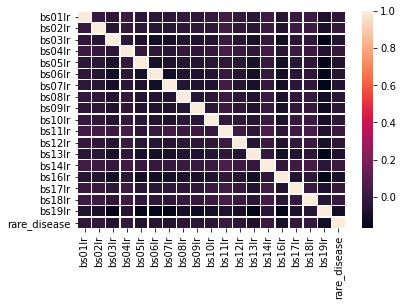

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(Correlation_Matrix, annot=False,linewidths=0.3)
plt.show()

In [43]:
total_list = []

rank_ordering_list = (my_rank_data_sorted.index)
for item in rank_ordering_list:
  total_list.append([item])

ordering = {"ordering" : total_list}

print(ordering)

{'ordering': [['External causes of injury'], ['RareDX'], ['Injury_and_poisoning'], ['Pregnancy, childbirth'], ['Congenital anomalies'], ['Skin and subcutaneous'], ['ill defined conditions'], ['blood system'], ['Nervous system'], ['Neoplasms'], ['Supplemental classification'], ['Genitourinary system'], ['Infectious and parasitic'], ['Respiratory system'], ['Digestive system'], ['Musculoskeletal system & connective tissue'], ['Mental disorders'], ['Endocrine, metabolic & immunity'], ['Circulatory system']]}


In [44]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

model = Lasso()
model.fit(C, b)

Lasso()

In [45]:
coef = pd.Series(model.coef_, index=C.columns).sort_values(ascending=True)
coef_df = coef \
    .to_frame(name='coefficient') \
    .reset_index() \
    .rename(columns={'index': 'code'}) \
    .assign(name=lambda d: d['code'].apply(lambda v: c2v[v]))[['name', 'code', 'coefficient']]
coef_df

,name,code,coefficient
0,E_codes,bs18lr,-0.092069
1,RareDX,rare_disease,-0.071118
2,Injury_and_poisoning,bs17lr,-0.061716
3,"Complications_of_pregnancy,_childbirth,_and_th...",bs11lr,-0.059929
4,Congenital_anomalies,bs14lr,-0.055841
5,Diseases_of_the_skin_and_subcutaneous_tissue,bs12lr,-0.041592
6,"Symptoms,_signs,_and_ill_defined_conditions",bs16lr,-0.031330
7,Diseases_of_the_blood_and_bloodforming_organs,bs04lr,-0.025030
8,Diseases_of_the_nervous_system_and_sense_organs,bs06lr,-0.018531
9,Neoplasms,bs02lr,-0.011269


In [47]:
def get_avg_days_to(code1, code2):
    q = f'(bc_1=="{code1}" and bc_2=="{code2}") or (bc_1=="{code2}" and bc_2=="{code1}")'
    temp_df = df.query(q)
    r = temp_df.iloc[0]
    
    if code1 == r['bc_1']:
        n1, n2 = r['n_1'], r['n_2']
    else:
        n1, n2 = r['n_2'], r['n_1']
    is_consistent = 1 if n1 >= n2 else 0
    
    return {
        'bc_current': code1,
        'bc_next': code2,
        'bc_1': r['bc_1'],
        'bc_2': r['bc_2'],
        'n': r['n'],
        'n_1': r['n_1'],
        'n_2': r['n_2'],
        'is_consistent': is_consistent,
        'sum_day_diff': r['sum_day_diff'],
        'avg_day_diff': r['avg_day_diff']
    }

def get_consistency_color(v):
    if pd.isna(v):
        return None
    if v == 1:
        return 'background-color: rgb(0, 255, 0, 0.18)'
    else:
        return 'background-color: rgb(0, 0, 255, 0.18)'

codes = coef_df['code']
enriched_coef_df = coef_df.join(pd.DataFrame([get_avg_days_to(code1, code2) for code1, code2 in zip(codes, codes[1:])]))
enriched_coef_df.style.applymap(get_consistency_color, subset=['is_consistent'])


,name,code,coefficient,bc_current,bc_next,bc_1,bc_2,n,n_1,n_2,is_consistent,sum_day_diff,avg_day_diff
0,Diseases_of_the_circulatory_system,bs07lr,0.177356,bs07lr,bs03lr,bs03lr,bs07lr,236654.000000,71451.000000,92427.000000,1.000000,-16117593.000000,-68.000000
1,"Endocrine,nutritional_and_metabolic diseases_and_immunity_disorders",bs03lr,0.141226,bs03lr,bs05lr,bs03lr,bs05lr,167953.000000,70078.000000,66826.000000,1.000000,7271597.000000,43.000000
2,Mental_disorders,bs05lr,0.109736,bs05lr,bs13lr,bs05lr,bs13lr,177852.000000,88085.000000,65136.000000,1.000000,29697660.000000,166.000000
3,Diseases_of_the_musculoskeletal_system_and_connective_tissue,bs13lr,0.025108,bs13lr,bs09lr,bs09lr,bs13lr,138272.000000,60503.000000,60263.000000,0.000000,894739.000000,6.000000
4,Diseases_of_the_digestive_system,bs09lr,0.023637,bs09lr,bs08lr,bs08lr,bs09lr,89307.000000,39115.000000,39949.000000,1.000000,-1142146.000000,-12.000000
5,Diseases_of_the_respiratory_system,bs08lr,0.018319,bs08lr,bs01lr,bs01lr,bs08lr,37774.000000,17810.000000,17580.000000,0.000000,1427342.000000,37.000000
6,Infectious_and_parasitic_diseases,bs01lr,0.016460,bs01lr,bs10lr,bs01lr,bs10lr,33429.000000,15515.000000,15427.000000,1.000000,3203398.000000,95.000000
7,Diseases_of_the_genitourinary_system,bs10lr,0.008504,bs10lr,bs19lr,bs10lr,bs19lr,150458.000000,73732.000000,67270.000000,1.000000,-4018836.000000,-26.000000
8,V_codes,bs19lr,-0.008323,bs19lr,bs02lr,bs02lr,bs19lr,114789.000000,54667.000000,53991.000000,0.000000,2415423.000000,21.000000
9,Neoplasms,bs02lr,-0.011269,bs02lr,bs06lr,bs02lr,bs06lr,80568.000000,38094.000000,37247.000000,1.000000,263825.000000,3.000000


In [18]:
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
import numpy
# load the dataset
url = r"C:\Users\Vurity\Downloads\BodySystemTrainTable\BodySystemTrainTable.csv"
dataframe = pd.read_csv(url)


In [19]:
dataframe = dataframe.fillna(0)

In [20]:
print(dataframe.isnull().sum())

id        0
dm        0
bs1lr     0
bs2lr     0
bs3lr     0
bs4lr     0
bs5lr     0
bs6lr     0
bs7lr     0
bs8lr     0
bs9lr     0
bs10lr    0
bs11lr    0
bs12lr    0
bs13lr    0
bs14lr    0
bs15lr    0
bs16lr    0
bs17lr    0
bs18lr    0
bs19lr    0
Vlr       0
dtype: int64


In [21]:
df = dataframe.values

In [22]:
X = df[:, 2:]
y = df[:, 1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X) 

X = scaler.transform(X)

In [23]:
# Test_dataset
url = r"C:\Users\Vurity\Downloads\test.csv"
dataframe_test = pd.read_csv(url)
dataframe_test = dataframe_test.fillna(0)
df_test = dataframe_test.values

X_test = df_test[:, 2:]
y_test = df_test[:, 1]


In [24]:
X_test = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X, y)

Lasso(alpha=1)

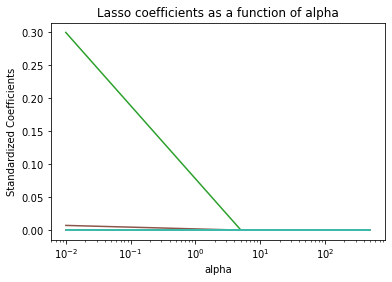

In [26]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [27]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X, y)
LassoCV(cv=5, max_iter=10000, random_state=0)
model.alpha_

1.7146899633912475e-05

In [28]:
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X, y)

Lasso(alpha=1.7146899633912475e-05)

In [29]:
w = np.array(lasso_best.coef_).transpose()
print(w)

[ 5.05855564e-02  5.70258525e-02  6.30801531e-01 -9.04799548e-02
  5.90140862e-02  5.96138486e-02  1.26155026e+00  6.20199609e-02
  1.28051954e-01  2.58571000e-02  3.58241732e-02  4.60674001e-02
 -5.40164789e-04  2.02979197e-03  0.00000000e+00  2.63633729e-02
  7.82235521e-02  0.00000000e+00  6.34634325e-02  3.60437978e-17]


In [30]:
print('R squared training set', round(lasso_best.score(X, y)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 8.75
R squared test set 8.43


In [31]:
import matplotlib.pyplot as plt

from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

y_pred_proba = lasso_best.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

In [32]:
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='estimator')

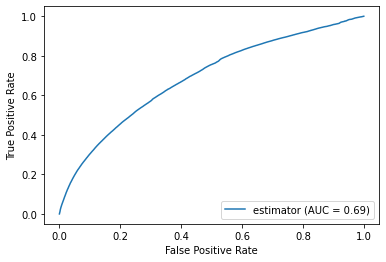

In [33]:
display.plot()

In [34]:
print(roc_auc)

0.6882141487782351


(1.2139075311086243e-05,
 0.02422063950677955,
 0.16416839770990146,
 0.18342792814497336)

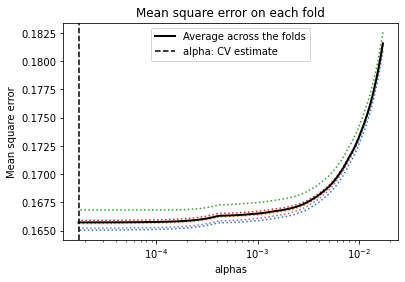

In [35]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")
